# SWAP gate classifier Simulation Summary

## Basic idea

### Support Vector Machine:
Optimized via optimizing dual lagrangian. Optimizer can be obtained from both <b>Scipy</b> and <b>qiskit</b> modules.Note that (minus) dual lagrangian is 

$$ 
\mathcal{L}_{classical}(\alpha)=\sum_{i, j}{\alpha_i\alpha_jy_iy_jk(\vec{x_i},\vec{x_j})}-\sum_i{\alpha_i}:0\leq\alpha, \alpha\leq C, \sum_i{\alpha_iy_i}=0 
$$ 

and seperating hyperplane is

$$
w = \sum_i{\alpha_iy_i\Phi(\vec{x_i})}, b = 
$$

### empirical SWAP classifier

We have non-optimizable SWAP classifier quatum circuit shown bellow.  

![pycon-logo.jpg](attachment:pycon-logo.jpg)

Classifing equation is,

$$
y_{est}=sgn( \sum_i{\alpha_iy_ik(\vec{x_i}, \vec{x_{test}})} 
$$

and objective function is empirical cross entropy

$$
\hat{y_j}=\sigma( \sum_i{\alpha_iy_ik(\vec{x_i}, \vec{\bar{x}_j})}))  
$$ 
$$
H(\bar{y}, \hat{y}) = -\frac{1}{N}\sum_{j=1}^N{\bar{y_j}log(\hat{y_j})+(1-\bar{y_j})log(1-\hat{y_j}) }
$$

### SWAP classifier
[image]
For quantum state, $\sum_i{\alpha}=1$. Therefore,

$$ 
\mathcal{L}_{quantum}(\alpha)=\sum_{i, j}{\alpha_i\alpha_jy_iy_jk(\vec{x_i},\vec{x_j})}-\sum_i{\alpha_i}:0\leq\alpha, \sum_i{\alpha_i}=1, \sum_i{\alpha_iy_i}=0 
$$ 

This is collinary of classical SVM dual lagrangian. We expect SWAP classifier to be perform better than SVM(i.e. *same error rate with faster learning speed and fewer parameters*)

## Implementation

For the sake of classical simulation speed, I've implemented classes that only the weighting circuit is simulated as quantum circuit and other part is purly matrix multiplication. These classes have the word 'peseudo' in their names. The 'real' simulation of SWAP classifier quantum circuit is possible with other classes, which have the word 'quantum' in their class names.

for more information, check repository [custum_qiskit]

## Performance

In [12]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt 

from qiskit import Aer

from classifier import SVM
from quantum_swap_classifier import quantum_SWAP_classifier, quantum_uniform_SWAP_classifier
from pseudo_swap_classifier import pseudo_SWAP_classifier, pseudo_uniform_SWAP_classifier, pseudo_empirical_SWAP_classifier
from datageneration import iris_data

Data X, y is drawn randomly from the famous iris data from **sklearn**. The number of data sample should be power of 2 ($N=2^n$) due to the leakage in $\alpha$.<br>
Total number of iris data is 150, so remaining data are used as test data (Xt, yt).<br>
Xin, Xout are data for empirical SWAP classifier. Since empirical SWAP classifier need validation data for optimization, half of X are treated as training data (Xin) and the other half as validation data (Xout)

In [1]:
backend = Aer.get_backend('qasm_simulator') # or any valid backend provided by qiskit

X, y, Xt, yt = iris_data(2**7)
Xin = np.array([X[2*i] for i in range(int(len(y)/2))])
Xout = np.array([X[2*i+1] for i in range(int(len(y)/2))])
yin = np.array([y[2*i] for i in range(int(len(y)/2))])
yout = np.array([y[2*i+1] for i in range(int(len(y)/2))])

Use hard margin Support vector machine ($C\rightarrow\infty$) since iris data is well seperable.  
In this case, $\alpha$ is constructed by entangler id #2 with 5 layer. For more information, read [reference](https://arxiv.org/abs/1905.10876)


In [32]:
svm = SVM(X, y, C=1000)
psvm = pseudo_SWAP_classifier(X, y, id=2, layer=5)
pusvm = pseudo_uniform_SWAP_classifier(X, y)
qsvm = quantum_SWAP_classifier(X, y, id=2, layer=5, backend=backend)

### calculation validation
The number of optimization parameter $\theta$ differ according to entangler ID and layers.

In [34]:
theta = np.random.rand(len(psvm.theta))
print(psvm.objective_function(theta), qsvm.objective_function(theta))

KeyboardInterrupt: 

from **scipy** minimization, optimize classifiers. Note that this takes time, especially *psvm*

In [3]:
svm.optimize(np.random.rand(svm.num_data))
psvm.optimize(np.random.rand(len(psvm.theta)))

Note that SWAP classifier can minic SVM to some level. Difference is originated from limited 

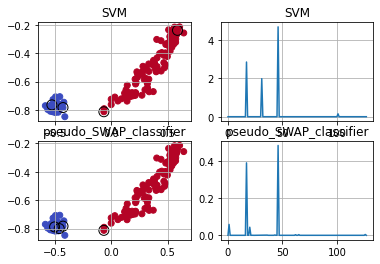

In [26]:
fig, axes = plt.subplots(2, 2)
a=(2, 3)
svm.plot(axes[0, 0], option='sv', a=a)
psvm.plot(axes[1, 0], option='sv', a=a)
svm.plot(axes[0, 1], option='alpha', a=a)
psvm.plot(axes[1, 1], option='alpha', a=a)